# 4. Re-run the original model with log-differenced original data
(not PPP-adjusted)

In [1]:
from IPython.display import display, HTML
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import pandas as pd
import seaborn as sns
sns.set(style='ticks', rc={'axes.grid':True,
                           'xtick.labelsize': 'medium',
                           'ytick.labelsize': 'medium',
#                            'font.size': 15,
                          })

analysis_dir = os.getcwd()
assert analysis_dir.endswith(os.path.join('em-2020','analysis'))
plot_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'tex', 'plots'))
data_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'data'))

In [2]:
suppressMessages({
library(lavaan)
library(semPlot)
library(semTools)
library(MVN)
library(Hmisc)
library(data.table)
library(dplyr)
library(tseries)
})

In [1]:
%get data_dir --from em-2020
cols <- c('year', 'ISG', 'TO', 'TI', 'P_GDP', 'EI')
data.raw <- read.csv(file.path(data_dir, 'WB_BGD_current.csv'))[cols]

log_cols <- c('EI', 'P_GDP', 'TI')
data.log <- copy(data.raw)
data.log[log_cols] <- log(data.raw[log_cols])
data.logdiff <- cbind(data.raw[-1,'year', drop=FALSE], diff(as.matrix(subset(data.log, select=-year))))

data <- subset(data.raw, year >= 1990 & year <= 2015)
data.log <- subset(data.log, year >= 1990 & year <= 2015)
data.logdiff <- subset(data.logdiff, year >= 1990 & year <= 2015)

data.logdiff

Variable data_dir does not exist


ERROR: Error in file.path(data_dir, "WB_BGD_current.csv"): object 'data_dir' not found


In [4]:
summary(lm('TI ~ ISG', data=data.logdiff))


Call:
lm(formula = "TI ~ ISG", data = data.logdiff)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46799 -0.09914  0.00704  0.11271  0.54103 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.02427    0.04233   0.573    0.571
ISG          0.02889    0.06808   0.424    0.675

Residual standard error: 0.2173 on 28 degrees of freedom
Multiple R-squared:  0.006391,	Adjusted R-squared:  -0.02909 
F-statistic: 0.1801 on 1 and 28 DF,  p-value: 0.6745


In [5]:
summary(lm('P_GDP ~ TO', data=data.logdiff))


Call:
lm(formula = "P_GDP ~ TO", data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.105803 -0.038457  0.005045  0.045312  0.123186 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.055147   0.010595   5.205 1.58e-05 ***
TO          -0.001168   0.003535  -0.330    0.744    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05595 on 28 degrees of freedom
Multiple R-squared:  0.00388,	Adjusted R-squared:  -0.0317 
F-statistic: 0.1091 on 1 and 28 DF,  p-value: 0.7437


In [6]:
summary(lm('EI ~ ISG + TO + TI + P_GDP', data=data.logdiff))


Call:
lm(formula = "EI ~ ISG + TO + TI + P_GDP", data = data.logdiff)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.06261 -0.01739 -0.00057  0.01337  0.05053 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0163557  0.0088034   1.858   0.0755 .  
ISG          0.0131157  0.0105036   1.249   0.2238    
TO           0.0016701  0.0019182   0.871   0.3926    
TI           0.0001083  0.0250055   0.004   0.9966    
P_GDP       -0.9071972  0.1112529  -8.154 2.25e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02823 on 24 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8138,	Adjusted R-squared:  0.7827 
F-statistic: 26.22 on 4 and 24 DF,  p-value: 1.874e-08


In [7]:
model.path <- '
## path model
EI ~ p_ei_isg*ISG + p_ei_to*TO + p_ei_ti*TI + p_ei_pgdp*P_GDP
TI ~ p_ti_isg*ISG
P_GDP ~ p_pgdp_to*TO
## indirect effect
p_ei_ti_isg := p_ei_ti*p_ti_isg
p_ei_pgdp_to := p_ei_pgdp*p_pgdp_to
## total effect
p_ei_isg_total := p_ei_isg + (p_ei_ti*p_ti_isg)
p_ei_to_total := p_ei_to + (p_ei_pgdp*p_pgdp_to)
'

capture <- function(expr, file) {
    writeLines(c('\\begin{verbatim}', 
                 capture.output(expr),
                 '\\end{verbatim}'), con=file)
}
model.path.fit <- sem(model.path, data=data.logdiff, estimator='MLR', missing='ML', meanstructure=TRUE, em.fx.tol=1e-6)
# capture(summary(model.path.fit, standardized=TRUE, header=TRUE,  fit.measures=TRUE, estimates=FALSE),
#         '../tex/plots/model.logdiff.fit.summary.tex')
# capture(summary(model.path.fit, standardized=TRUE, header=FALSE, estimates=TRUE),
#         '../tex/plots/model.logdiff.fit.estimates.tex')
summary(model.path.fit, standardized=TRUE, fit.measures=TRUE)

lavaan 0.6-5 ended normally after 69 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         12
                                                      
  Number of observations                            30
  Number of missing patterns                         2
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                                 7.118       8.115
  Degrees of freedom                                 3           3
  P-value (Chi-square)                           0.068       0.044
  Scaling correction factor                                  0.877
    for the Yuan-Bentler correction (Mplus variant) 

Model Test Baseline Model:

  Test statistic                                56.169      52.820
  Degrees of freedom                                 9     

In [8]:
soln.std <- as.data.frame(standardizedSolution(model.path.fit, se=TRUE, type='std.all', remove.def=FALSE))
fit.measures <- as.data.frame(fitMeasures(model.path.fit))
r.square <- lavInspect(model.path.fit, 'rsquare')
n.x <- 3

In [9]:
%get soln.std --from R
%get r.square --from R
%get fit.measures --from R
display(np.round(soln_std, 3))
display(r_square)

Variable soln.std is put to SoS as soln_std
Variable r.square is put to SoS as r_square
Variable fit.measures is put to SoS as fit_measures


,lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
0,EI,~,ISG,0.135,0.103,1.305,0.192,-0.068,0.337
1,EI,~,TO,0.085,0.073,1.168,0.243,-0.058,0.228
2,EI,~,TI,0.000,0.080,0.005,0.996,-0.156,0.156
3,EI,~,P_GDP,-0.867,0.052,-16.769,0.000,-0.968,-0.766
4,TI,~,ISG,0.080,0.265,0.301,0.763,-0.440,0.600
5,P_GDP,~,TO,-0.062,0.177,-0.352,0.725,-0.409,0.284
6,EI,~~,EI,0.205,0.073,2.824,0.005,0.063,0.348
7,TI,~~,TI,0.994,0.042,23.435,0.000,0.911,1.077
8,P_GDP,~~,P_GDP,0.996,0.022,45.192,0.000,0.953,1.039
9,ISG,~~,ISG,1.000,0.000,NaN,NaN,1.000,1.000


EI       0.794624
TI       0.006391
P_GDP    0.003880
dtype: float64

In [10]:
df = soln_std.query('(lhs != rhs) & (op == "~")').copy()
df.index = np.where(df.op == '~', df.lhs.str.cat([df.op, df.rhs], sep=' '), df.lhs)
df = df.loc[['TI ~ ISG', 'P_GDP ~ TO', 'EI ~ ISG', 'EI ~ TO', 'EI ~ TI', 'EI ~ P_GDP']]
df['Equation'] = ['1', '2', '3', '', '', '']
df['Dep. var.'] = df.lhs.str.replace('P_GDP', r'P\_GDP')
df['Ind. var.'] = df.rhs.str.replace('P_GDP', r'P\_GDP')
df['Coefficient'] = ('$P_{' + df.lhs + ',' + df.rhs + '}$').str.replace('P_GDP', r'P\_GDP')
df['Est. (std.)'] = np.round(df['est.std'],3)
df['S.E. (std.)'] = np.round(df['se'],3)
df['p-value'] = ['{:.3f}'.format(x) if x >= 0.001 else '*' for x in df['pvalue']]
df['$R^{2}$'] = ''
df['$R^{2}$'].iloc[0:3] = ['{:.3f}'.format(x) for x in r_square.loc[['TI', 'P_GDP', 'EI']]]
df = df[['Equation', 
         'Dep. var.', 'Ind. var.', 
         'Coefficient', 'Est. (std.)', 'S.E. (std.)', 'p-value', '$R^{2}$']]
display(df)
print(df.to_latex(escape=False, index=False))

/home/drake/.virtualenvs/em-2020/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Equation,Dep. var.,Ind. var.,Coefficient,Est. (std.),S.E. (std.),p-value,$R^{2}$
TI ~ ISG,1,TI,ISG,"$P_{TI,ISG}$",0.080,0.265,0.763,0.006
P_GDP ~ TO,2,P\_GDP,TO,"$P_{P\_GDP,TO}$",-0.062,0.177,0.725,0.004
EI ~ ISG,3,EI,ISG,"$P_{EI,ISG}$",0.135,0.103,0.192,0.795
EI ~ TO,,EI,TO,"$P_{EI,TO}$",0.085,0.073,0.243,
EI ~ TI,,EI,TI,"$P_{EI,TI}$",0.000,0.080,0.996,
EI ~ P_GDP,,EI,P\_GDP,"$P_{EI,P\_GDP}$",-0.867,0.052,*,


\begin{tabular}{llllrrll}
\toprule
Equation & Dep. var. & Ind. var. &      Coefficient &  Est. (std.) &  S.E. (std.) & p-value & $R^{2}$ \\
\midrule
       1 &        TI &       ISG &     $P_{TI,ISG}$ &        0.080 &        0.265 &   0.763 &   0.006 \\
       2 &    P\_GDP &        TO &  $P_{P\_GDP,TO}$ &       -0.062 &        0.177 &   0.725 &   0.004 \\
       3 &        EI &       ISG &     $P_{EI,ISG}$ &        0.135 &        0.103 &   0.192 &   0.795 \\
         &        EI &        TO &      $P_{EI,TO}$ &        0.085 &        0.073 &   0.243 &         \\
         &        EI &        TI &      $P_{EI,TI}$ &        0.000 &        0.080 &   0.996 &         \\
         &        EI &    P\_GDP &  $P_{EI,P\_GDP}$ &       -0.867 &        0.052 &       * &         \\
\bottomrule
\end{tabular}



In [11]:
df = soln_std.query('(lhs != rhs) & (op in ["~", ":="])').copy()
df.index = np.where(df.op == '~', df.lhs.str.cat([df.op, df.rhs], sep=' '), df.lhs)
display(np.round(df, 3))
out = pd.DataFrame({'Causal variable': ['ISG', 'TO', 'TI', 'P\_GDP'], 
                    'DE coeff.': np.nan, 'DE s.e.': np.nan, 'DE p-value': np.nan,
                    'IE coeff.': np.nan, 'IE s.e.': np.nan, 'IE p-value': np.nan,
                    'TE coeff.': np.nan, 'TE s.e.': np.nan, 'TE p-value': np.nan})
out.iloc[0:4, 1:4] = df.iloc[0:4, [3,4,6]].values
out.iloc[0:2, 4:7] = df.iloc[6:8, [3,4,6]].values
out.iloc[0:2, 7:10] = df.iloc[8:10, [3,4,6]].values
out.iloc[2:4, 7:10] = df.iloc[2:4, [3,4,6]].values
f3 = lambda x: '{:.3f}'.format(x) if np.isfinite(x) else ''
out.iloc[:, [1,2,4,5,7,8]] = out.iloc[:, [1,2,4,5,7,8]].applymap(f3)
f3p = lambda x: '{:.3f}'.format(x) if x >= 0.001 else '*' if np.isfinite(x) else ''
out.iloc[:, [3,6,9]] = out.iloc[:, [3,6,9]].applymap(f3p)
display(out)
print(out.to_latex(escape=False, index=False))

,lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
EI ~ ISG,EI,~,ISG,0.135,0.103,1.305,0.192,-0.068,0.337
EI ~ TO,EI,~,TO,0.085,0.073,1.168,0.243,-0.058,0.228
EI ~ TI,EI,~,TI,0.000,0.080,0.005,0.996,-0.156,0.156
EI ~ P_GDP,EI,~,P_GDP,-0.867,0.052,-16.769,0.000,-0.968,-0.766
TI ~ ISG,TI,~,ISG,0.080,0.265,0.301,0.763,-0.440,0.600
P_GDP ~ TO,P_GDP,~,TO,-0.062,0.177,-0.352,0.725,-0.409,0.284
p_ei_ti_isg,p_ei_ti_isg,:=,p_ei_ti*p_ti_isg,0.000,0.006,0.005,0.996,-0.012,0.013
p_ei_pgdp_to,p_ei_pgdp_to,:=,p_ei_pgdp*p_pgdp_to,0.054,0.152,0.354,0.723,-0.245,0.353
p_ei_isg_total,p_ei_isg_total,:=,p_ei_isg+(p_ei_ti*p_ti_isg),0.135,0.103,1.309,0.190,-0.067,0.337
p_ei_to_total,p_ei_to_total,:=,p_ei_to+(p_ei_pgdp*p_pgdp_to),0.139,0.176,0.790,0.430,-0.206,0.485


,Causal variable,DE coeff.,DE s.e.,DE p-value,IE coeff.,IE s.e.,IE p-value,TE coeff.,TE s.e.,TE p-value
0,ISG,0.135,0.103,0.192,0.000,0.006,0.996,0.135,0.103,0.190
1,TO,0.085,0.073,0.243,0.054,0.152,0.723,0.139,0.176,0.430
2,TI,0.000,0.080,0.996,,,,0.000,0.080,0.996
3,P\_GDP,-0.867,0.052,*,,,,-0.867,0.052,*


\begin{tabular}{llllllllll}
\toprule
Causal variable & DE coeff. & DE s.e. & DE p-value & IE coeff. & IE s.e. & IE p-value & TE coeff. & TE s.e. & TE p-value \\
\midrule
            ISG &     0.135 &   0.103 &      0.192 &     0.000 &   0.006 &      0.996 &     0.135 &   0.103 &      0.190 \\
             TO &     0.085 &   0.073 &      0.243 &     0.054 &   0.152 &      0.723 &     0.139 &   0.176 &      0.430 \\
             TI &     0.000 &   0.080 &      0.996 &           &         &            &     0.000 &   0.080 &      0.996 \\
         P\_GDP &    -0.867 &   0.052 &          * &           &         &            &    -0.867 &   0.052 &          * \\
\bottomrule
\end{tabular}



In [12]:
fit_table = fit_measures.loc[['pvalue.scaled', 'rmsea.robust', 'cfi.robust', 'srmr']]
fit_table.index = [r'$\chi^2$', 'RMSEA', 'CFI', 'SRMR']
fit_table.columns = ['value']
fit_table['cut-off'] = ['$> 0.05$', '$<0.08$', '$\geq 0.90$', '$<0.08$']
display(np.round(fit_table, 3))
print(np.round(fit_table, 3).to_latex(escape=False))

,value,cut-off
$\chi^2$,0.044,$> 0.05$
RMSEA,0.223,$<0.08$
CFI,0.904,$\geq 0.90$
SRMR,0.132,$<0.08$


\begin{tabular}{lrl}
\toprule
{} &  value &      cut-off \\
\midrule
$\chi^2$ &  0.044 &     $> 0.05$ \\
RMSEA    &  0.223 &      $<0.08$ \\
CFI      &  0.904 &  $\geq 0.90$ \\
SRMR     &  0.132 &      $<0.08$ \\
\bottomrule
\end{tabular}



      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.4338825 -0.0000002  0.0000000  0.0052105  0.0278550  0.3584065 

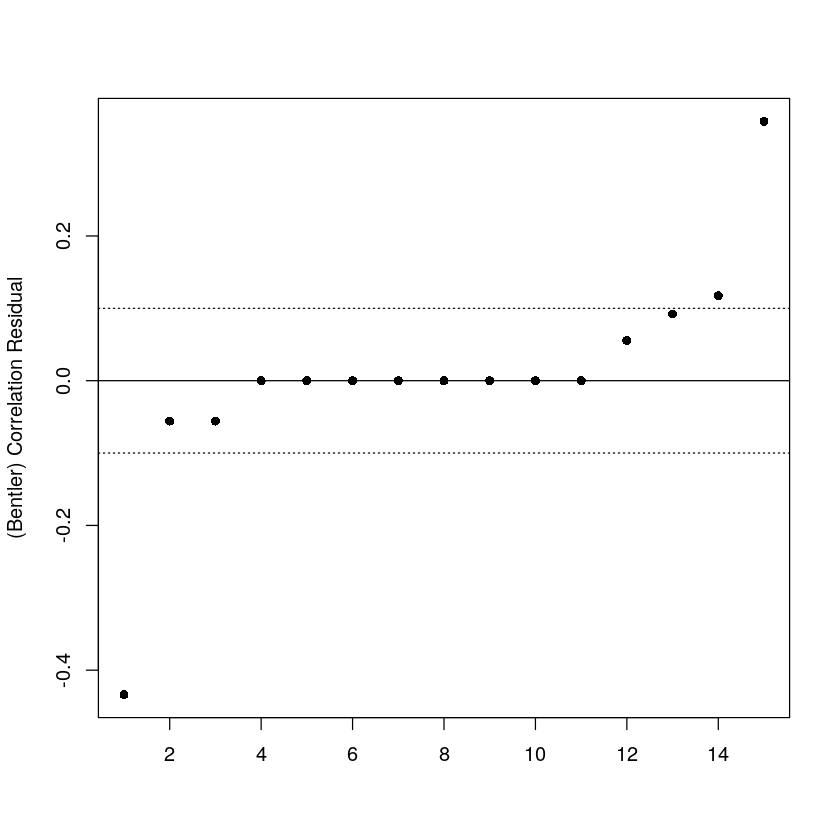

In [13]:
# Extract unique correlation residuals
model.path.fit.resid <- as.data.frame(resid(model.path.fit, type='cor.bentler')$cov)
resid <- model.path.fit.resid[lower.tri(model.path.fit.resid, diag=TRUE)]

summary(resid)

plot(resid[order(resid)], pch=16, xlab='', ylab='(Bentler) Correlation Residual')
abline(h=c(0, -.1, .1), lty=c(1,3,3))

In [14]:
%get model.path.fit.resid --from R
def plot_corr_resid(corr, figsize=None, **kwargs):
    mask = 1 - np.tril(np.ones_like(corr, dtype=np.bool))
    corr_text = np.vectorize('{:.3f}'.format)(corr)
    if figsize is None:
        figsize=np.array([1, 0.75]) * corr.shape[0] + np.array([kwargs.get('cbar', True) * 1.5, 0])
    f, ax = plt.subplots(figsize=figsize)
    cmap = sns.diverging_palette(10, 10, s=50, l=75, sep=100, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=corr_text, fmt='', mask=mask, cmap=cmap, vmin=-0.1, vmax=0.1, 
                square=False, linewidths=.25, **kwargs)
    ax.set_yticklabels(ax.get_yticklabels(), fontdict={'verticalalignment': 'center'})

def save_fig(file, **kwargs):
    path = os.path.join(plot_dir, file)
    plt.savefig(path, metadata={'CreationDate': None})

Variable model.path.fit.resid is put to SoS as model_path_fit_resid


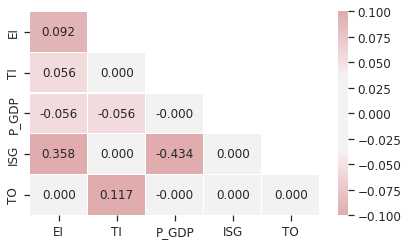

In [15]:
plot_corr_resid(model_path_fit_resid)
# save_fig('updated_correlation_residuals.pdf')


Call:
lm(formula = data.logdiff$ISG ~ resid)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5365 -0.3109  0.1234  0.3534  1.0085 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.21699    0.09918   2.188   0.0372 *
resid       -4.68695    1.83488  -2.554   0.0164 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5432 on 28 degrees of freedom
Multiple R-squared:  0.189,	Adjusted R-squared:   0.16 
F-statistic: 6.525 on 1 and 28 DF,  p-value: 0.01636


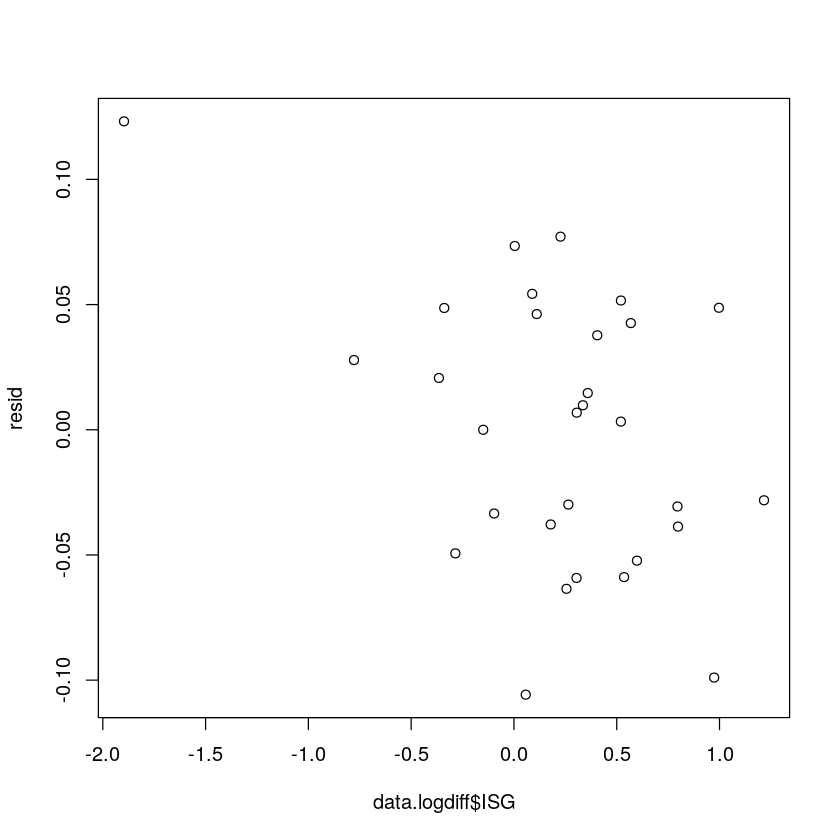

In [17]:
resid <- residuals_lavaan(model.path.fit)$P_GDP
summary(lm(data.logdiff$ISG ~ resid))
plot(data.logdiff$ISG, resid)


Call:
lm(formula = P_GDP ~ ISG, data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.110112 -0.038256  0.003465  0.038103  0.084228 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.063248   0.009765   6.477 5.12e-07 ***
ISG         -0.041612   0.015704  -2.650   0.0131 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05012 on 28 degrees of freedom
Multiple R-squared:  0.2005,	Adjusted R-squared:  0.1719 
F-statistic: 7.022 on 1 and 28 DF,  p-value: 0.01309


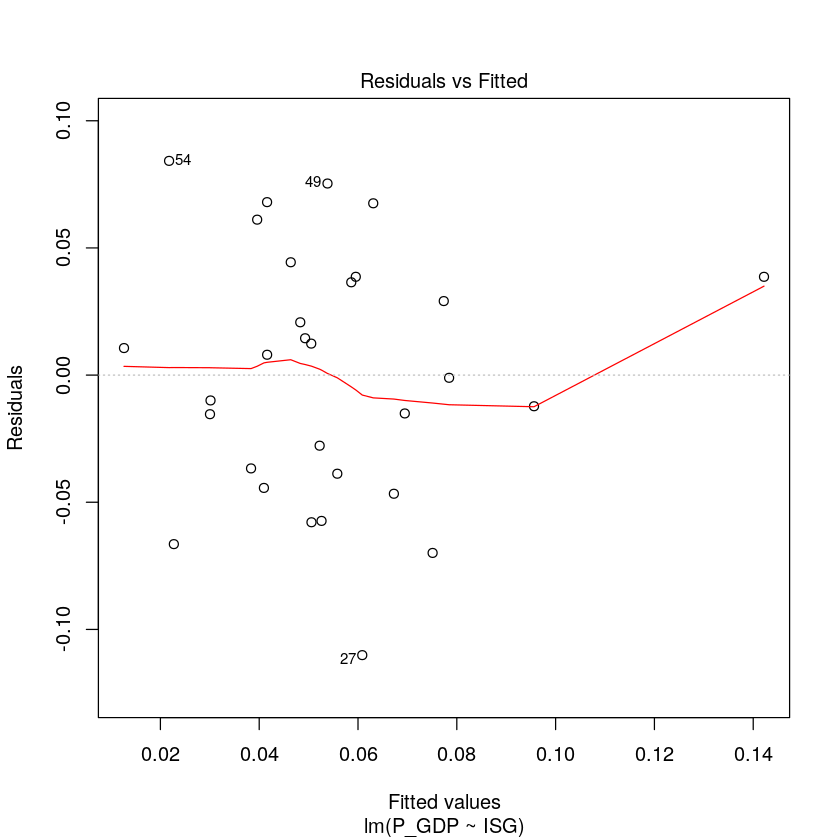

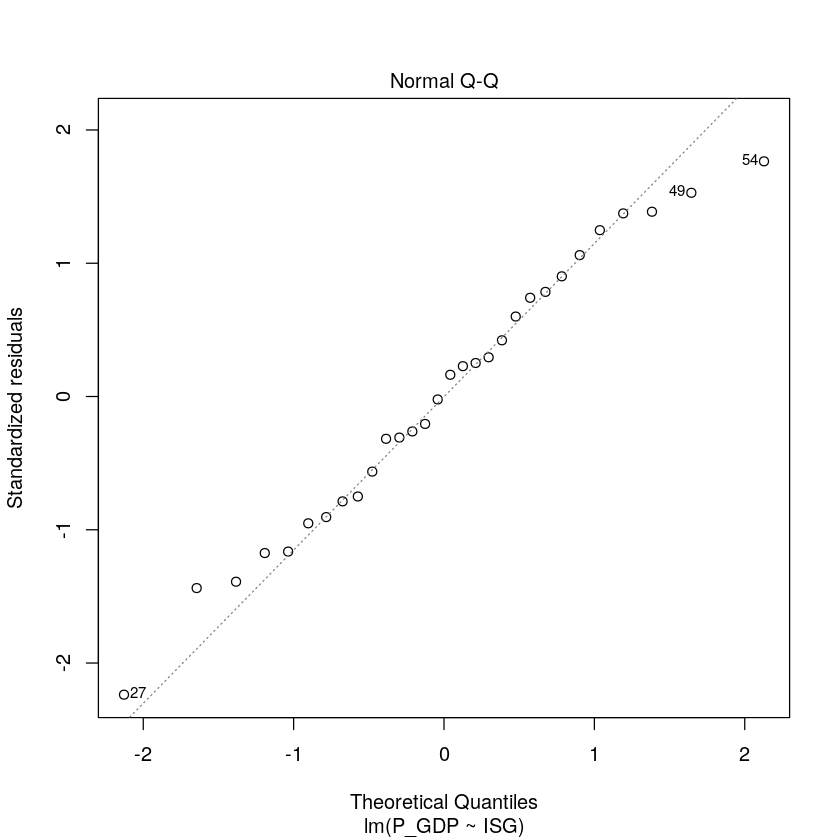

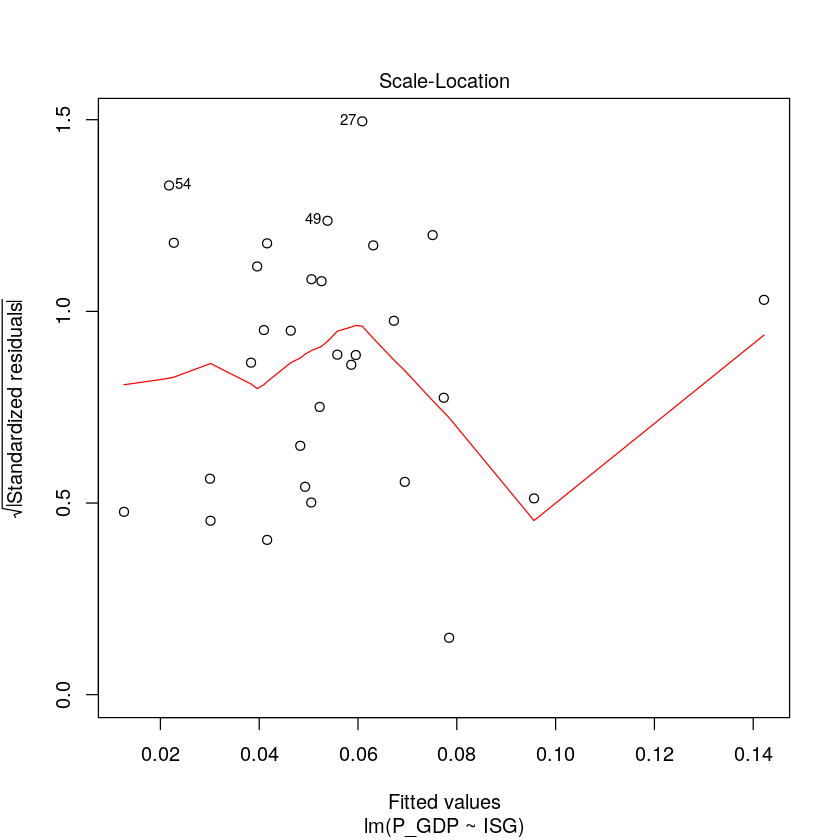

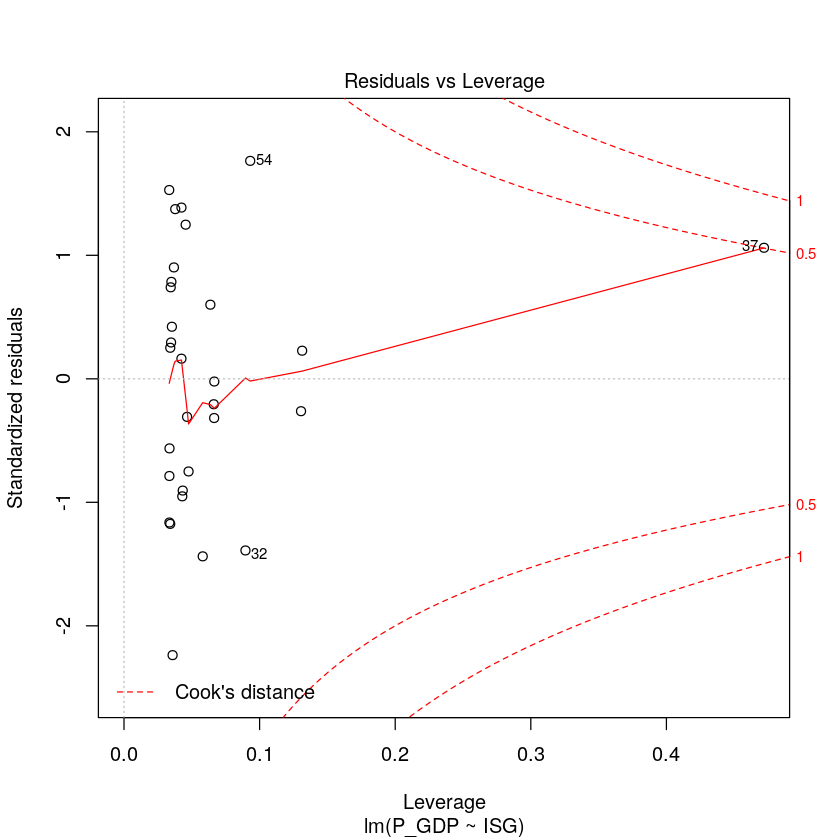

In [20]:
m <- lm(P_GDP ~ ISG, data=data.logdiff)
summary(m)
plot(m)

In [26]:
data.logdiff['37',]

,year,ISG,TO,TI,P_GDP,EI
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
37,1996,-1.896908,-2.133408,-0.3900971,0.1808243,-0.1962229
